In [119]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [120]:
#Inputs
x = np.array([1.0,0.05,0.1])
#Outputs
y = np.array([0.01,0.99])
#Initial a1
a1 = x

#Randomising the initial weights
theta1 = np.random.rand(2,3)
theta2 = np.random.rand(2,3)

#Learing Rate- Alpha
alpha = 0.5


In [121]:
#Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [122]:
#forward propagation
def forwardpp(theta_1,theta_2):
    #Hidden Layer
    z2 = np.matmul(theta_1,a1.transpose())
    a2 = []
    a2.append(1.0)
    a2.append(sigmoid(z2[0]))
    a2.append(sigmoid(z2[1]))
    a2 = np.array(a2)
    
    #Output
    z3 = np.matmul(theta_2,a2.transpose())
    a3 = []
    a3.append(sigmoid(z3[0]))
    a3.append(sigmoid(z3[1]))
    a3 = np.array(a3)
    J = (1/2)*(math.pow(y[0]-a3[0],2) + math.pow(y[1]-a3[1],2))
    return a2,a3,J

In [123]:
#back propagation
def backpp(a2,a3,theta1,theta2):
    #Output Layer
    delta_J_z1_lyr3 = (a3[0]-y[0])*(a3[0]*(1-a3[0]))
    delta_J_theta1_lyr2 = delta_J_z1_lyr3*a2
    delta_J_z2_lyr3 = (a3[1]-y[1])*(a3[1]*(1-a3[1]))
    
    delta_J_theta2_lyr2 = delta_J_z2_lyr3*a2
    delta_J_theta2 = np.array([delta_J_theta1_lyr2,delta_J_theta2_lyr2])
    theta2 = theta2 - (alpha * delta_J_theta2)
    
    #Hidden Layer
    delta_J1_z1_lyr2 = (a3[0]-y[0])*(a3[0]*(1-a3[0]))*theta2[0][1]*(a2[0]*(1-a2[0]))
    delta_J2_z1_lyr2 = (a3[1]-y[1])*(a3[1]*(1-a3[1]))*theta2[1][1]*(a2[0]*(1-a2[0]))
    delta_J_z1_lyr2 = delta_J1_z1_lyr2 + delta_J2_z1_lyr2
    delta_J_theta1_lyr1 = delta_J_z1_lyr2*a1
    
    delta_J1_z2_lyr2 = (a3[0]-y[0])*(a3[0]*(1-a3[0]))*theta2[0][1]*(a2[1]*(1-a2[1]))
    delta_J2_z2_lyr2 = (a3[1]-y[1])*(a3[1]*(1-a3[1]))*theta2[1][1]*(a2[1]*(1-a2[1]))
    delta_J_z2_lyr2 = delta_J1_z2_lyr2 + delta_J2_z2_lyr2
    
    delta_J_theta2_lyr1 = delta_J_z2_lyr2*a1
    delta_J_theta1 = np.array([delta_J_theta1_lyr1,delta_J_theta2_lyr1])
    
    theta1 = theta1 - (alpha * delta_J_theta1)
    return theta1,theta2

In [124]:
J =[]
iterations = []
t1_1 = []
t1_2 = []
t1_3 = []
t1_4 = []
t1_5 = []
t1_6 = []
t2_1 = []
t2_2 = []
t2_3 = []
t2_4 = []
t2_5 = []
t2_6 = []
for i in range(1000):
    a2,a3,j = forwardpp(theta1,theta2)
    J.append(j)
    iterations.append(i)
    theta1,theta2 = backpp(a2,a3,theta1,theta2)
    t1_1.append(theta1[0][0])
    t1_2.append(theta1[0][1])
    t1_3.append(theta1[0][2])
    t1_4.append(theta1[1][0])
    t1_5.append(theta1[1][1])
    t1_6.append(theta1[1][2])
    t2_1.append(theta2[0][0])
    t2_2.append(theta2[0][1])
    t2_3.append(theta2[0][2])
    t2_4.append(theta2[1][0])
    t2_5.append(theta2[1][1])
    t2_6.append(theta2[1][2])

    

Plot of Cost vs Iterations

C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


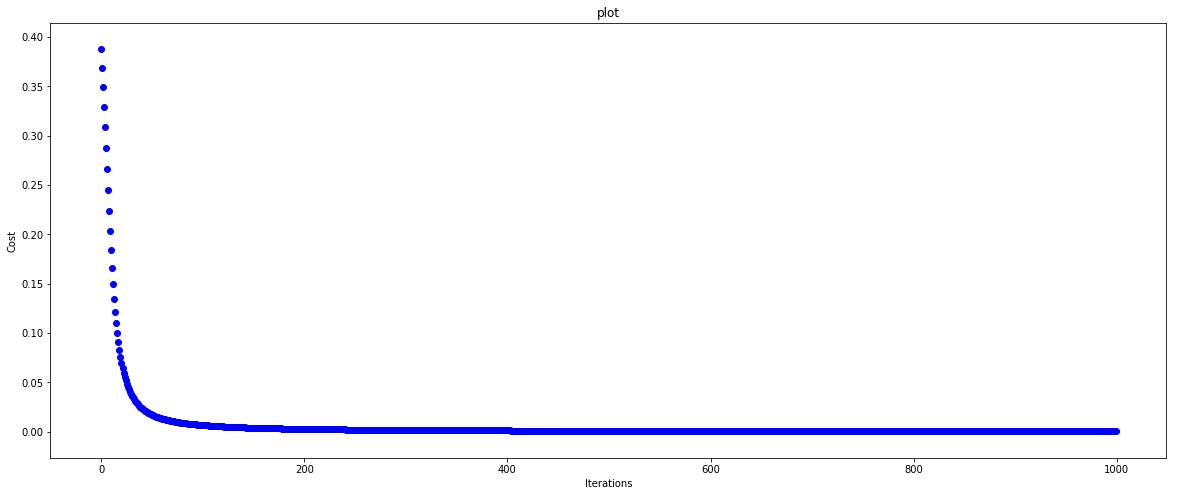

In [128]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('plot')
ax.scatter(iterations,J,color='blue')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
fig.show()

Plot of Theta1 vs Iterations

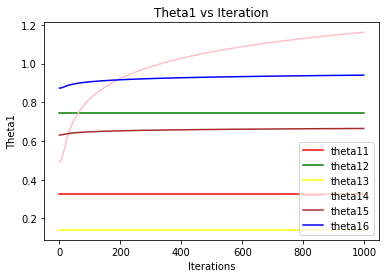

In [126]:
plt.plot(iterations,t1_1,color='red',label ='theta11')
plt.plot(iterations,t1_2,color='green',label ='theta12')
plt.plot(iterations,t1_3,color='yellow',label ='theta13')
plt.plot(iterations,t1_4,color='pink',label ='theta14')
plt.plot(iterations,t1_5,color='brown',label ='theta15')
plt.plot(iterations,t1_6,color='blue',label ='theta16')
plt.xlabel('Iterations')
plt.ylabel('Theta1')
plt.legend()
plt.title('Theta1 vs Iteration')
plt.show()

Plot of Theta2 vs Iterations

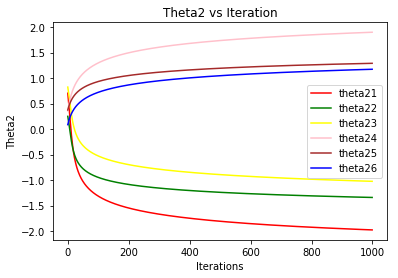

In [127]:
plt.plot(iterations,t2_1,color='red' ,label ='theta21')
plt.plot(iterations,t2_2,color='green',label ='theta22')
plt.plot(iterations,t2_3,color='yellow',label ='theta23')
plt.plot(iterations,t2_4,color='pink',label ='theta24')
plt.plot(iterations,t2_5,color='brown',label ='theta25')
plt.plot(iterations,t2_6,color='blue',label ='theta26')
plt.xlabel('Iterations')
plt.ylabel('Theta2')
plt.legend()
plt.title('Theta2 vs Iteration')
plt.show()